Pymaceuticals Inc.
Analysis
I read the mouse data and study results from CSV files and merged them into a single DataFrame.Also I identified and handled duplicate entries, specifically for Mouse ID g989.Then We calculated key summary statistics (mean, median, variance, standard deviation, and standard error) for tumor volumes across different drug regimens.From these statistics, drugs like Capomulin and Ramicane showed lower mean and median tumor volumes compared to others.

Conclusions
Capomulin and Ramicane treatments resulted in lower average tumor volumes compared to other drugs, which may mean these regimens are more susccess in reducing tumor growth. This is supported by the statistics and visualizations in this jupyter notebook

There is correlation between mouse weight and average tumor volume for the Capomulin regimen. This indicates that when mice are more heavier they tend to have larger tumor volumes.



In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [145]:
# Checking the number of mice.
mice_count=len(study_data_complete['Mouse ID'].value_counts())
mice_count

249

In [146]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.# taking from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicates_total= study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates_mice_timepoint = duplicates_total['Mouse ID'].unique()
duplicates_mice_timepoint

array(['g989'], dtype=object)

In [147]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_id=study_data_complete.loc[study_data_complete['Mouse ID']==duplicates_mice_timepoint[0],:]
duplicates_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mice_data = study_data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep=False)
drop_mice_data = drop_mice_data[drop_mice_data['Mouse ID'] != duplicates_mice_timepoint[0]]
drop_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [149]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(drop_mice_data['Mouse ID'].value_counts())
new_mice_count

248

In [150]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen.
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = drop_mice_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = drop_mice_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = drop_mice_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev = drop_mice_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err = drop_mice_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_total =pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_Volume,"Median Tumor Volume": Median_Tumor_Volume,
"Tumor Volume Variance": Tumor_Volume_Variance,"Tumor Volume Std. Dev.": Tumor_Volume_Std_Dev,"Tumor Volume Std. Err.": Tumor_Volume_Std_Err})

# Display the DataFrame
summary_total


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [151]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggr_data = drop_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',median='median',variance='var',std='std',sem='sem' )
print(summary_aggr_data )

                   mean     median   variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


<Axes: xlabel='Drug Regimen', ylabel='# of Observe mouse timepoint'>

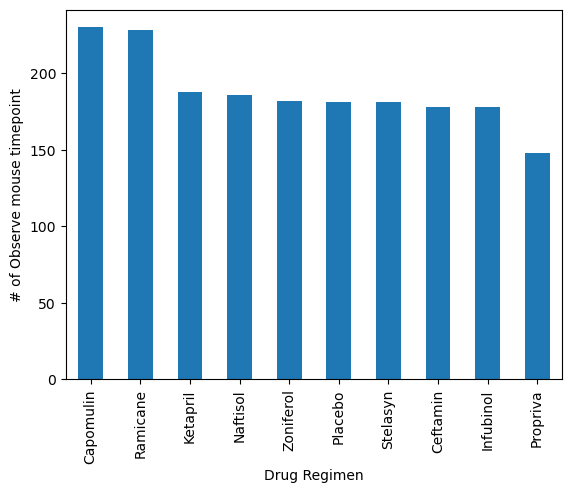

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_bar= drop_mice_data.groupby('Drug Regimen')['Timepoint'].count()

data_bar=data_bar.sort_values(ascending=False)
data_bar.plot(kind="bar", ylabel='# of Observe mouse timepoint', xlabel='Drug Regimen' )

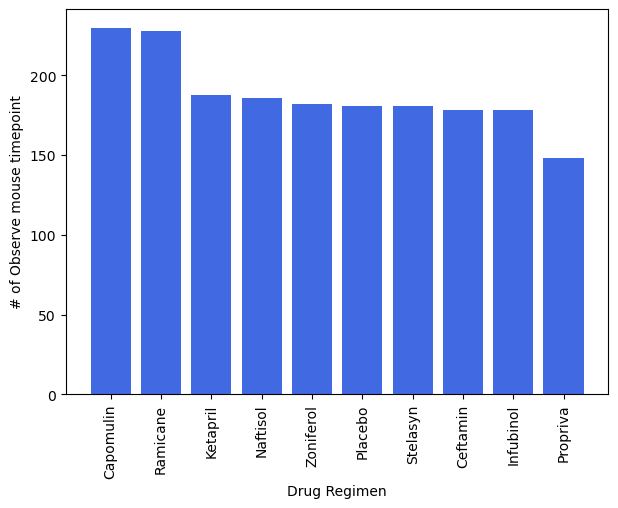

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_new_graf=pd.DataFrame(data_bar)
x_axis=np.arange(len(data_new_graf))
tick_locations=[values for values in x_axis]

plt.figure(figsize=(7, 5)) 
plt.bar(x_axis,data_new_graf['Timepoint'] , color='royalblue')
plt.xticks(tick_locations,data_new_graf.index,rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observe mouse timepoint')

plt.show()

array([<Axes: ylabel='count'>], dtype=object)

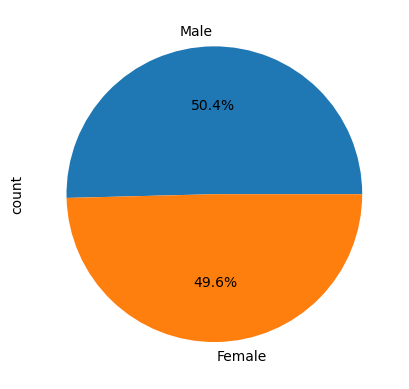

In [154]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
pie_bar = drop_mice_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Make the pie chart
pie_bar.plot(kind='pie', ylabel="count",subplots=True,autopct='%1.1f%%')


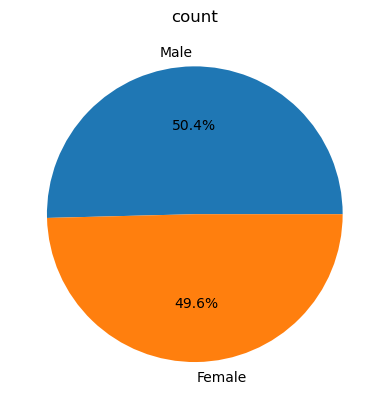

In [155]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

plt.pie(pie_bar, labels=pie_bar.index, autopct='%1.1f%%')
plt.title('count')
plt.show()


In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

filter_d=drop_mice_data[drop_mice_data['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
last_greatest_timepoint=drop_mice_data.groupby('Mouse ID')['Timepoint'].max()
merge_data = pd.merge(last_greatest_timepoint, filter_d, on=['Mouse ID', 'Timepoint'], how='left')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,NaN,NaN,NaN,NaN,NaN,NaN
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
243,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
244,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
245,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
246,z795,45,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]
for t in  treatments_list:
    t_data=merge_data[merge_data['Drug Regimen']==t]['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = t_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = t_data[(t_data < lower_bound) | (t_data > upper_bound)]

    # add subset
    tumor_vol_data.append(t_data)
    

    # Determine outliers using upper and lower bounds
    print(f"{t}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\eek_e\AppData\Local\Temp\ipykernel_28240\3119431436.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments_list,flierprops=flierprops)


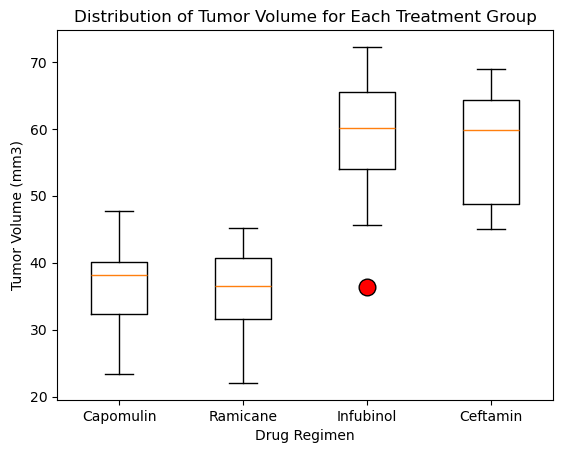

In [158]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)# this was taken from https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
plt.boxplot(tumor_vol_data, labels=treatments_list,flierprops=flierprops)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

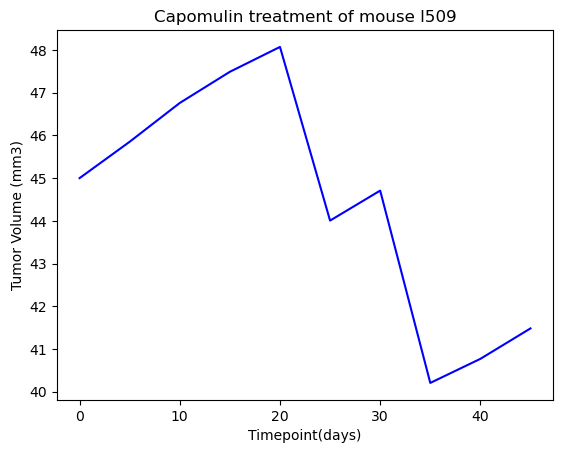

In [159]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plot_capomulin=drop_mice_data[(drop_mice_data['Mouse ID'] == 'l509') & (drop_mice_data['Drug Regimen'] == 'Capomulin')]


plt.plot(plot_capomulin['Timepoint'], plot_capomulin['Tumor Volume (mm3)'], color='b')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


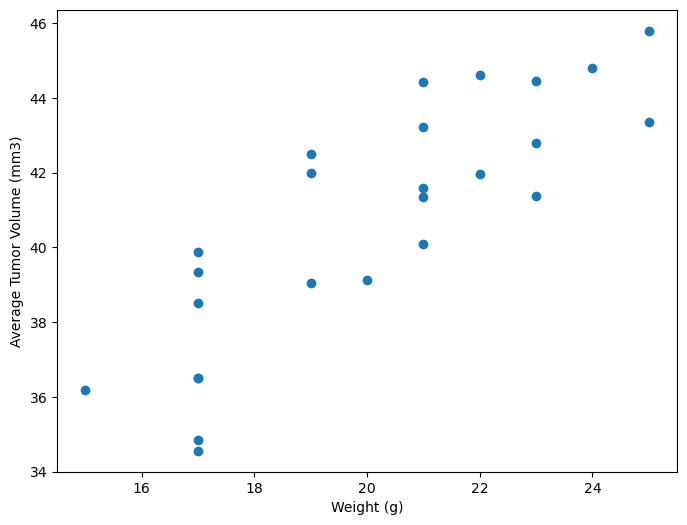

In [160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_info=drop_mice_data[drop_mice_data['Drug Regimen'] == 'Capomulin']
mouse_weight=capomulin_info.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume_avg=capomulin_info.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


The correlation coefficient between mouse weight and average tumor volume is 0.84


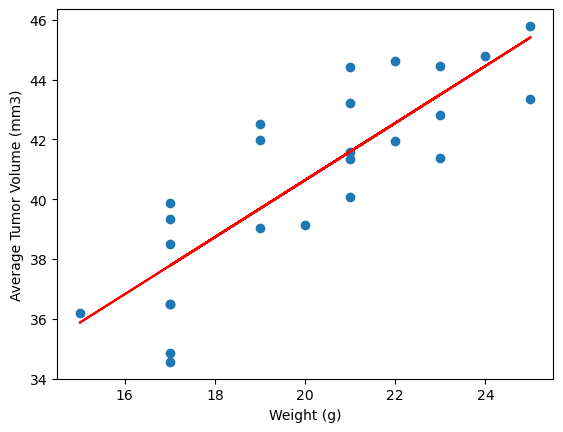

In [161]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = drop_mice_data[drop_mice_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
y_values=avg_tumor_volume
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
x_values=mouse_weight
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
print(f'The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#PLotting
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()